# Die Normalverteilung

In dieser Übung werden wir die wichtigste Wahrscheinlichkeitsverteilung untersuchen: die Normalverteilung. Wenn wir sicher sind, dass unsere Daten annähernd normal sind, können wir viele leistungsstarke statistischen Methoden einsetzen, die es uns erlauben Schlüsse über die Daten hinaus zu ziehen. Hier werden wir grafische Werkzeuge verwenden, um die Normalität eines Datensatzes zu beurteilen und lernen, wie man Zufallszahlen aus einer Normalverteilung erzeugt.

## Die Daten

In dieser Übung werden Sie mit Fast-Food-Daten arbeiten. Der Datensatz enthält Daten zu 515 Produkten von einigen der beliebtesten Fast-Food-Restaurants weltweit. Werfen wir einen kurzen Blick auf die ersten paar Zeilen der Daten.

In [18]:
import numpy as np
import pandas as pd
import plotly.express as px

fastfood = pd.read_csv("Daten/fastfood.csv")
fastfood

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other


Sie werden sehen, dass es für jede Beobachtung 17 Messungen gibt, von denen viele Nährwertangaben sind.

Für den Anfang werden Sie sich nur auf drei Spalten konzentrieren: `restaurant`, `calories` (Kalorien), `cal_fat` (Kalorien aus Fett).

Konzentrieren wir uns zunächst nur auf die Produkte von McDonalds und Dairy Queen.

In [102]:
mcdonals = fastfood[fastfood["restaurant"] == "Mcdonalds"]
dairy_queen = fastfood[fastfood["restaurant"] == "Dairy Queen"]

### ✏️ Aufgabe 1
Erstellen Sie ein Diagramm (oder mehrere Diagramme), um die Verteilungen der Kalorienmenge aus Fett (`cal_fat`) der Optionen dieser beiden Restaurants zu visualisieren. Vergleichen sie die Mittelpunkte, Form und Streuung für beide Restaurants.

## Die Normalverteilung

Haben Sie in Ihrer Beschreibung der Verteilungen Begriffe wie glockenförmig oder normal verwendet? Diese Begriffe liegen nahe, wenn es sich um eine unimodale (eingipflige) symmetrische Verteilung handelt.

Um zu sehen, wie genau diese Beschreibung ist, können wir eine Normalverteilungskurve über ein Histogramm legen, um zu sehen, wie genau die Daten einer Normalverteilung folgen. Diese Normalkurve sollte den gleichen Mittelwert und die gleiche Standardabweichung wie die Daten haben. Wir werden uns auf die Kalorien aus Fett von Dairy Queen-Produkten konzentrieren, also speichern wir sie als separates Objekt und berechnen dann einige Statistiken, auf die wir später zurückgreifen werden.

In [103]:
dqmean = dairy_queen['cal_fat'].mean()
dqsd = dairy_queen['cal_fat'].std()

Als Nächstes erstellen wir ein Dichtehistogramm, das als Hintergrund dient, und legen darüber die Kurve der Wahrscheinlichkeitsdichte einer Normalverteilung. Der Unterschied zwischen einem Häufigkeitshistogramm und einem Dichtehistogramm besteht darin, dass sich bei einem Häufigkeitshistogramm die *Höhe* der Balken zur Gesamtzahl der Beobachtungen addiert, während sich bei einem Dichtehistogramm die *Fläche* der Balken zu 1 addiert. Die Fläche jedes Balkens kann einfach als die Höhe mal die Breite des Balkens berechnet werden. Die Verwendung eines Dichtehistogramms ermöglicht es, eine Normalverteilungskurve über das Histogramm zu legen, da die Kurve eine Wahrscheinlichkeitsdichtefunktion ist, die ebenfalls eine Fläche unter der Kurve von 1 hat. Häufigkeits- und Dichtehistogramme haben genau dieselbe Form; sie unterscheiden sich nur in ihrer y-Achse. Sie können dies überprüfen, indem Sie das Häufigkeitshistogramm, das Sie zuvor erstellt haben, mit dem Dichtehistogramm vergleichen, das mit den folgenden Befehlen erstellt wurde.

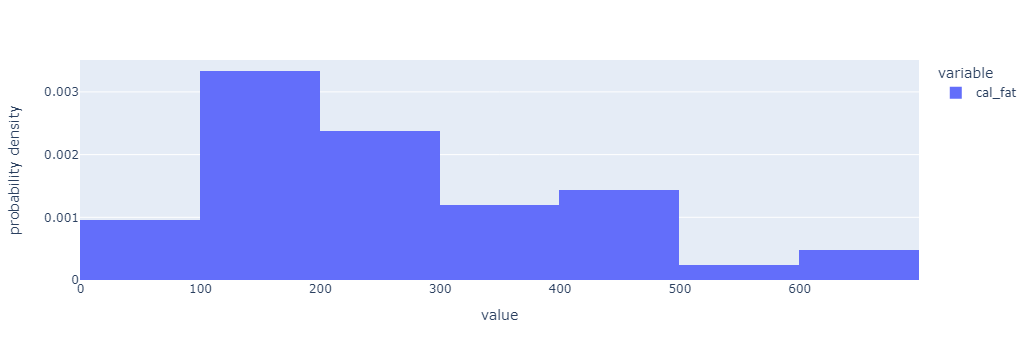

In [104]:
px.histogram(dairy_queen['cal_fat'], histnorm="probability density")

Als nächstes möchten wir die Dichtekurve der Normalverteilung mit den Parametern $\mu=$`dqmean` und $\sigma=$`dqstd` erzeugen und zum Plot hinzufügen. Zunächst erstellen wir die x- und y-Koordinaten für die Normalkurve. Wir haben den x-Bereich mit 0 bis 700 gewählt, um den gesamten Wertebereich der Variable `cal_fat` abzudecken. Die Funktionswerte erzeugen wir uns mit der Funktion `norm.pdf` aus dem Modul `scipy.stats` (pdf steht hier für probability density function).

In [105]:
from scipy.stats import norm

# Erzeuge einen Vektor mit 101 äquidistanten Samples zwischen 0 und 700 
x = np.linspace(0, 700, 101)       
y = norm.pdf(x, loc = dqmean, scale = dqsd)

Nun möchten wir die Dichtefunktion als Linie zum Histogrammplot hinzufügen. Dazu speichern wir zunächst den Histogrammplot in einer Variable und fügen dann die Dichtekurve hinzu. Dies geschieht in plotly mittels `add_scatter` (eigentlich ein Streuplot, der aber hier als Linie dargestellt wird)

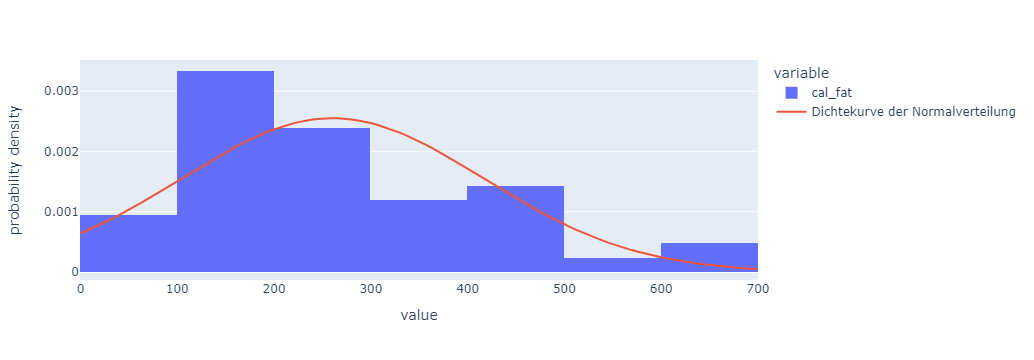

In [106]:
hist = px.histogram(dairy_queen['cal_fat'], histnorm="probability density")
hist.add_scatter(x=x, y=y, name=f"Dichtekurve der Normalverteilung")
hist.show()

### ✏️ Aufgabe 2
Sieht es so aus, als ob die Daten einer annähernden Normalverteilung folgen?

## Evaluating the normal distribution

Ein Blick auf die Form des Histogramms ist eine Möglichkeit, um festzustellen, ob die Daten annähernd normalverteilt sind, aber es kann sehr schwierig bzw. unklar sein, zu entscheiden, wie nahe das Histogramm an der Kurve liegt. Ein alternativer Ansatz besteht darin, ein normales Wahrscheinlichkeitsdiagramm zu erstellen, das auch als normales Q-Q-Diagramm für "Quantil-Quantil" bezeichnet wird.

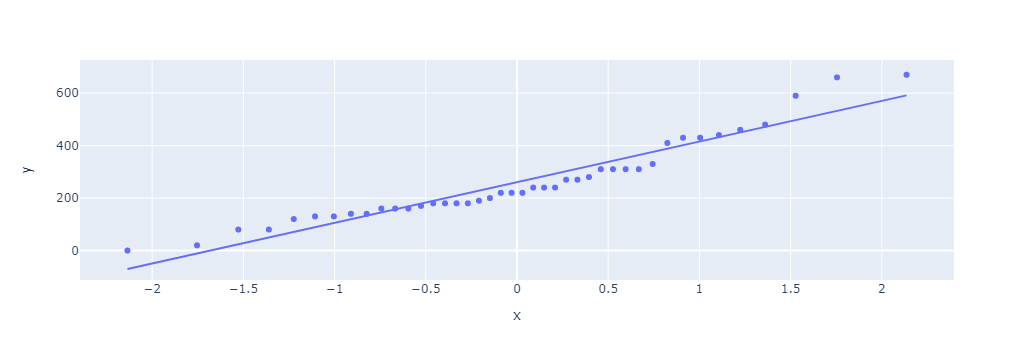

In [107]:
from scipy.stats import probplot

(Q_x, Q_y) = probplot(dairy_queen['cal_fat'], fit=False)
px.scatter(x=Q_x, y=Q_y, trendline="ols")

Die Werte auf der x-Achse entsprechen den Quantilen einer theoretischen Normalkurve mit Mittelwert 0 und Standardabweichung 1 (d. h. der Standardnormalverteilung). Die Werte auf der y-Achse entsprechen den Quantilen der ursprünglichen, nicht standardisierten Stichprobendaten. Aber auch wenn wir die Stichprobendatenwerte standardisieren würden, sähe die Q-Q-Kurve identisch aus. Ein nahezu normaler Datensatz führt zu einem Wahrscheinlichkeitsdiagramm, bei dem die Punkte eng an einer diagonalen Linie liegen. Jede Abweichung von der Normalität führt zu einer Abweichung der Punkte von dieser Linie.

Das Diagramm für die Kalorien aus Fett von Dairy Queen zeigt Punkte, die tendenziell der Linie folgen, aber mit einigen abweichenden Punkten am oberen Ende. Hier stellt sich das gleiche Problem wie beim obigen Histogramm: Wie nah ist nah genug?

Diese Frage lässt sich sinnvollerweise folgendermaßen umformulieren: Wie sehen Wahrscheinlichkeitsdiagramme für Daten aus, von denen ich *weiß*, dass sie aus einer Normalverteilung stammen? Wir können diese Frage beantworten, indem wir Daten aus einer Normalverteilung mit `np.random.norm` simulieren.

In [109]:
sim_norm = np.random.normal(size = len(dairy_queen['cal_fat']), loc = dqmean, scale = dqsd)

Das erste Argument gibt an, wie viele Zahlen Sie generieren möchten. Wir geben an, dass dies die gleiche Anzahl von Produkten im dairy_queen-Datensatz ist, indem wir die Funktion `len()` verwenden. Die letzten beiden Argumente (`loc` and `scale`) bestimmen den Mittelwert und die Standardabweichung der Normalverteilung, aus der die simulierte Stichprobe erzeugt wird. Wir können uns die Form unseres simulierten Datensatzes, `sim_norm`, sowie die Darstellung der Normalwahrscheinlichkeit ansehen.

<div class = 'exercise'>
<h4>Exercise 3</h4>
Make a normal probability plot of <code>sim_norm</code>. Do all of the points fall on the line? How does this plot compare to the probability plot for the real data?
</div>

### ✏️ Aufgabe 3
Erstellen Sie ein Normalwahrscheinlichkeitsdiagramm von `sim_norm`. Fallen alle Punkte auf die Linie? Wie verhält sich diese Darstellung im Vergleich zur Wahrscheinlichkeitsdarstellung für die realen Daten?

Noch besser als der Vergleich des ursprünglichen Diagramms mit einem einzelnen Diagramm, das aus einer Normalverteilung generiert wurde, ist der Vergleich mit vielen weiteren Diagrammen, bei denen zufällig Daten aus einer Normalverteilung generiert wurden. Der folgende Code generiert 9 Plots: in der linken oberen Ecke sieht man den Q-Q-Plot, die den Originaldaten entspricht. Die restlichen Plots zeigen Q-Q-Plots von 8 verschiedenen simulierten *normalverteilten* Daten. Je nachdem, welches Gerät sie benutzen, kann es sinnvoll sein, die Parameter `width` und `height` zu modifizieren oder die Zoom Funktionalität von plotly zu benutzen.

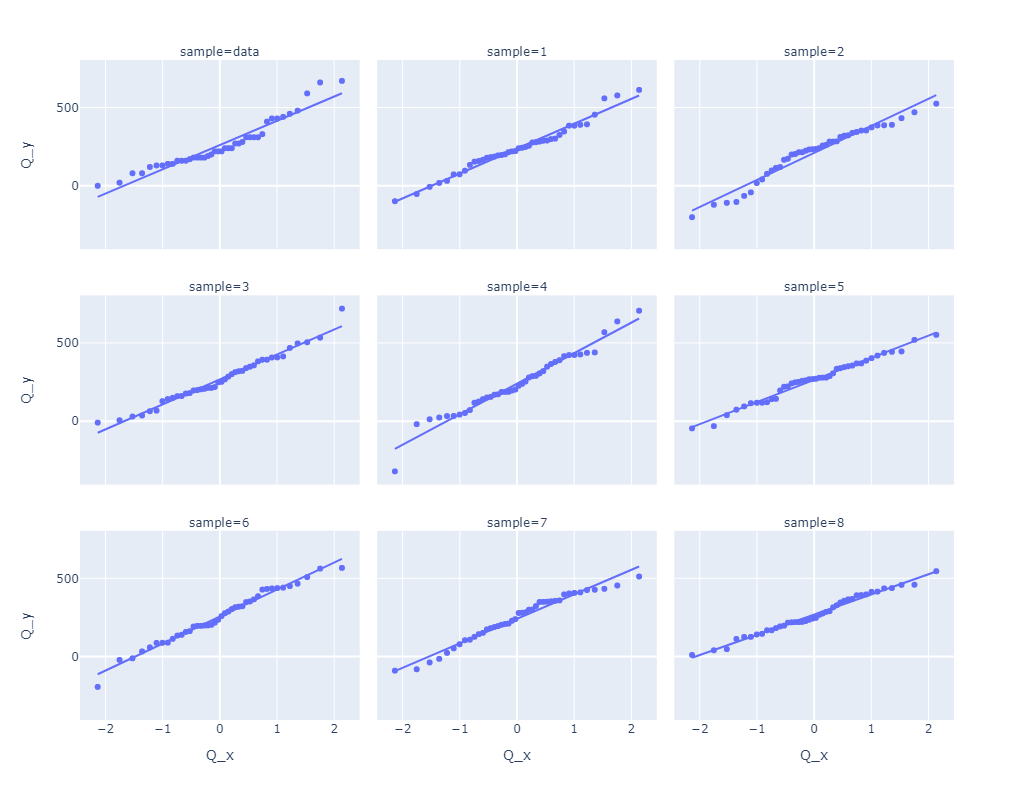

In [111]:
(Q_x, Q_y) = probplot(dairy_queen['cal_fat'], fit=False)

sim_qq_data = [pd.DataFrame({"Q_x": Q_x, "Q_y": Q_y, "sample": "data"})]
for i in range(8):
    sim_norm = np.random.normal(size = len(dairy_queen['cal_fat']), loc = dqmean, scale = dqsd)
    (Q_x, Q_y) = probplot(sim_norm, fit=False)
    sim_qq_data.append( pd.DataFrame({"Q_x": Q_x, "Q_y": Q_y, "sample": str(i+1)}) )
sim_qq_data = pd.concat(sim_qq_data)

px.scatter(sim_qq_data, x="Q_x", y="Q_y", facet_col="sample", facet_col_wrap=3, trendline="ols", width=800, height=800)

In [ ]:
# draw random samples from a normal distribution eight times, 
# so we can construct eight different normal probability plots
sim_norm_8 = []
for i in range(8):
    sim_norm_8.append(np.random.normal(size = len(fdims['hgt']), loc = fhgtmean, scale = fhgtsd))

# compare the original plot to nine plots generated from a normal distribution.
plt.rcParams['figure.figsize'] = (15, 15)
plt.tight_layout(pad = 1) # adjust the subplots to fit in to the figure area.
plt.subplots_adjust(hspace = 0.6, wspace = 0.6) # adjust the amount of width and height reserved for space between subplots.

plt.subplot(3, 3, 1)
probplot(fdims['hgt'], plot = plt)
plt.title('Normal Q-Q Plot (Data)')

plt.subplot(3, 3, 2)
probplot(sim_norm_8[0], plot = plt)
plt.title('Normal Q-Q Plot (Sim 1)')

plt.subplot(3, 3, 3)
probplot(sim_norm_8[1], plot = plt)
plt.title('Normal Q-Q Plot (Sim 2)')

plt.subplot(3, 3, 4)
probplot(sim_norm_8[2], plot = plt)
plt.title('Normal Q-Q Plot (Sim 3)')

plt.subplot(3, 3, 5)
probplot(sim_norm_8[3], plot = plt)
plt.title('Normal Q-Q Plot (Sim 4)')

plt.subplot(3, 3, 6)
probplot(sim_norm_8[4], plot = plt)
plt.title('Normal Q-Q Plot (Sim 5)')

plt.subplot(3, 3, 7)
probplot(sim_norm_8[5], plot = plt)
plt.title('Normal Q-Q Plot (Sim 6)')

plt.subplot(3, 3, 8)
probplot(sim_norm_8[6], plot = plt)
plt.title('Normal Q-Q Plot (Sim 7)')

plt.subplot(3, 3, 9)
probplot(sim_norm_8[7], plot = plt)
plt.title('Normal Q-Q Plot (Sim 8)')

plt.show();

### ✏️ Aufgabe 4
Sieht der Q-Q-Plot für `dairy_queen['cal_fat']` ähnlich aus wie die Darstellungen für die simulierten Daten? Das heißt, liefern die Diagramme Hinweise darauf, dass `dairy_queen['cal_fat']` nahezu normalverteilt ist?

### ✏️ Aufgabe 5
Bestimmen Sie mit der gleichen Technik, ob die Kalorien aus dem McDonald's-Menü (Spalte `calories`) einer Normalverteilung zu entstammen scheinen oder nicht.

## Wahrscheinlichkeiten von Normalverteilungen

Sie haben nun einige Werkzeuge, um zu beurteilen, ob eine Variable normalverteilt ist oder nicht. Warum sollte uns das interessieren?

Es stellt sich heraus, dass Statistiker viel über die Normalverteilung wissen. Sobald man feststellt, dass eine Zufallsvariable annähernd normalverteilt ist, kann man alle möglichen Fragen zu dieser Variablen im Zusammenhang mit der Wahrscheinlichkeit beantworten. Nehmen wir zum Beispiel die Frage: "Wie groß ist die Wahrscheinlichkeit, dass ein zufällig ausgewähltes Produkt von Dairy Queen mehr als 600 Kalorien aus Fett hat?"

Wenn wir davon ausgehen, dass die Kalorien aus Fett auf der Speisekarte von Dairy Queen normalverteilt sind (eine sehr genaue Annäherung ist auch in Ordnung), können wir diese Wahrscheinlichkeit durch Berechnung eines Z-Scores und Konsultation einer Z-Tabelle (auch *Normalwahrscheinlichkeitstabelle* genannt) ermitteln. In Python wird dies in einem Schritt mit der Funktion `norm.cdf()` aus `scipy.stats` durchgeführt.

In [ ]:
from scipy.stats import norm

prob_using_Z = 1 - norm.cdf(182, loc = fhgtmean, scale = fhgtsd)
round(prob_using_Z, 4)

Die Funktion `norm.cdf()` gibt die Fläche unter der Normalkurve *unterhalb* eines bestimmten Wertes q mit einem bestimmten Mittelwert und einer bestimmten Standardabweichung an. Da wir uns für die Wahrscheinlichkeit interessieren, dass ein Dairy-Queen-Artikel *mehr* als 500 Kalorien aus Fett hat, müssen wir 1 minus diese Wahrscheinlichkeit nehmen.

In [122]:
from scipy.stats import norm

prob_theoretical = 1 - norm.cdf(500, loc = dqmean, scale = dqsd)
round(prob_theoretical, 4)

0.0629

Unter der Annahme einer Normalverteilung konnten wir eine theoretische Wahrscheinlichkeit berechnen. Wenn wir die Wahrscheinlichkeit empirisch berechnen wollen, müssen wir lediglich feststellen, wie viele Beobachtungen über 600 liegen, und diese Zahl durch den Gesamtumfang der Stichprobe teilen.

In [123]:
prob_empirical = (sum(dairy_queen['cal_fat'] > 500) / len(dairy_queen['cal_fat']))
round(prob_empirical, 4)

0.0714

Obwohl die Wahrscheinlichkeiten nicht genau gleich sind, liegen sie recht nahe beieinander. Je näher Ihre Verteilung an der Normalverteilung liegt, desto genauer sind die theoretischen Wahrscheinlichkeiten.

### ✏️ Aufgabe 6
Formulieren Sie zwei Wahrscheinlichkeitsfragen, die Sie für eines der Restaurants in diesem Datensatz beantworten möchten. Berechnen Sie diese Wahrscheinlichkeiten sowohl mit der theoretischen Normalverteilung als auch mit der empirischen Verteilung (insgesamt vier Wahrscheinlichkeiten). Bei welcher der beiden Fragen war die Übereinstimmung größer?

---

Diese Übung ist eine deutsche Übersetzung der Übungen aus OpenIntro Statistics von Andrew Bray und Mine Çetinkaya-Rundel (https://www.openintro.org/book/os/). Die Python Adaption wurde teilweise von David Akman und Imran Ture (www.featureranking.com) übernommen.